In [1]:
import sys
import os
from IPython.core.display import display, HTML

"""
On Windows, sometimes, some cuda libraries does not work very well. One needs to add the cuda path mannually.
The following line is an example.
"""
#os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli\Anaconda3\envs\python36\Library\bin"
os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli93\Miniconda3\envs\python36\Library\bin"

"""
Because I have not realised this package. To use this package, one can not simply install with pip.
Instead, one needs to clone from the repo and append the path to this repo to the system path variable.
"""
sys.path.append('C:/Users/hyli93/Documents/GitHub/Phasing/')

"""
This line is totally optional. It only changes the cell width.
"""
display(HTML("<style>.container { width:95% !important; }</style>"))

# Import some other necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import PhaseTool   # This is the name of this package
import copy
from scipy import ndimage

# Create a smooth object

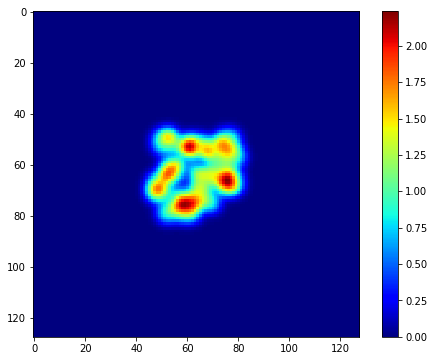

In [2]:
sample = PhaseTool.util.get_smooth_sample(support_length=32, space_length=128, obj_num=34)

fig = plt.figure(figsize=(8,6))
plt.imshow(sample, cmap='jet')
plt.colorbar()
plt.show()

# Get the diffraction info

In [3]:
diffraction = np.fft.ifftshift(np.fft.fftn(sample))
magnitude = np.abs(diffraction)

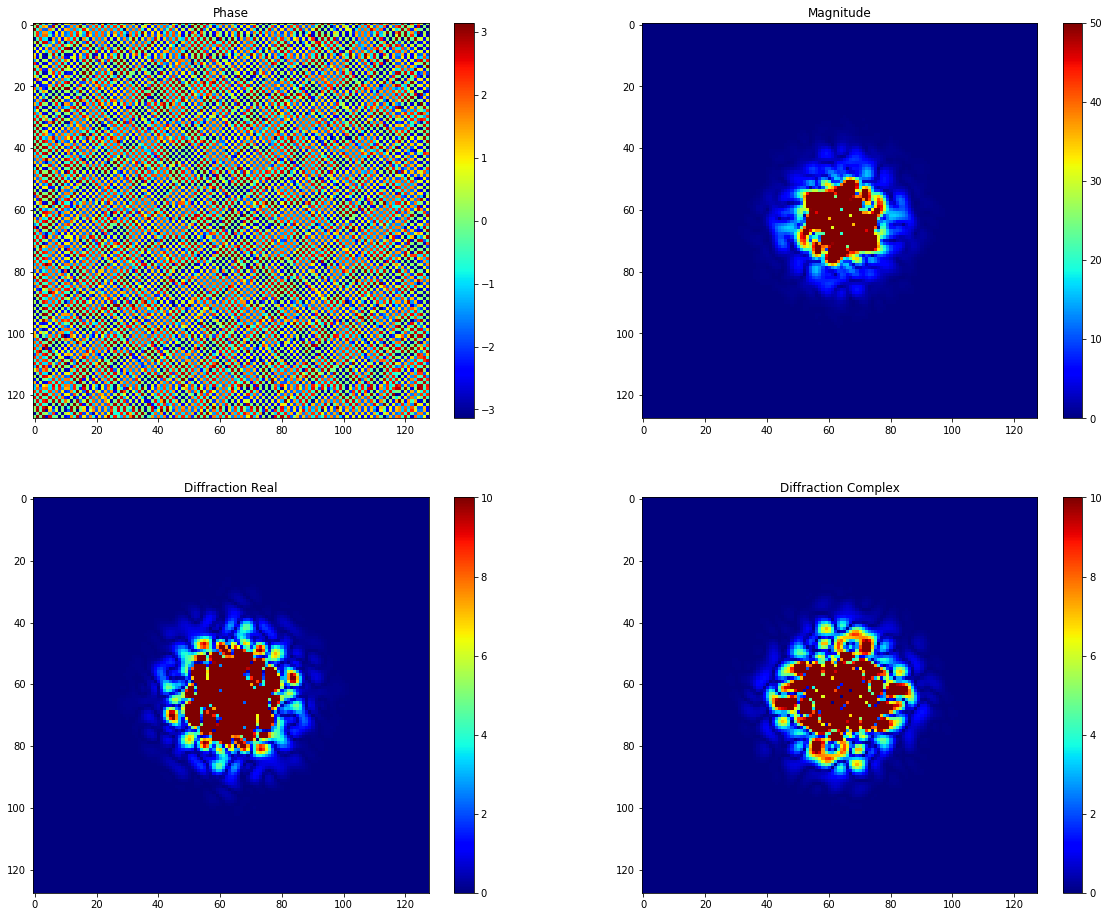

In [4]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(np.angle(diffraction), cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Phase")

im = axes[0,1].imshow(magnitude, vmax=50, cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Magnitude")

im = axes[1,0].imshow(np.abs(diffraction.real), vmax=10,cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Diffraction Real")

im = axes[1,1].imshow(np.abs(diffraction.imag), vmax=10,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("Diffraction Complex")

# Show the canvas
plt.show()  

# Begin Test

In [5]:
# Step 1: Create a object
alter_proj = PhaseTool.AlterProj.CpuAlterProj()

# Step 2: Initialize the object with the data
alter_proj.initialize_easy(magnitude=magnitude,
                           magnitude_mask=np.ones_like(magnitude,dtype=np.bool),
                           full_initialization=False)
# Step 3: Set initial guess
alter_proj.use_auto_support(threshold=0.04,gaussian_filter=True,sigma=1.0,fill_detector_gap=False,)

alter_proj.derive_initial_density(fill_detector_gap=False, method="Random")

alter_proj.update_input_dict()

alter_proj.shrink_warp_properties(on=False,
                                  threshold_ratio=0.04,
                                  sigma=10.,
                                  decay_rate=50,
                                  threshold_ratio_decay_ratio=1.0,
                                  sigma_decay_ratio=0.99,
                                  filling_holes=False,
                                  convex_hull=False)
    
alter_proj.set_beta_and_iter_num(beta=0.90,
                                 iter_num=1200,
                                 decay=True, 
                                 decay_rate=30)

alter_proj.set_algorithm(alg_name="RAAR")

The center of the diffraction is :
[64. 64.]
Disable shrink wrap functions.
The user uses a constant value for the beta value. The value is beta = 0.9
This values is recognized as the initial beta value for a list of decaying beta values. The length of this list is the iter_num valuewhich is 1200


In [6]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj.execute_algorithm()

Using algorithm RAAR
Finishes self-consistency check.


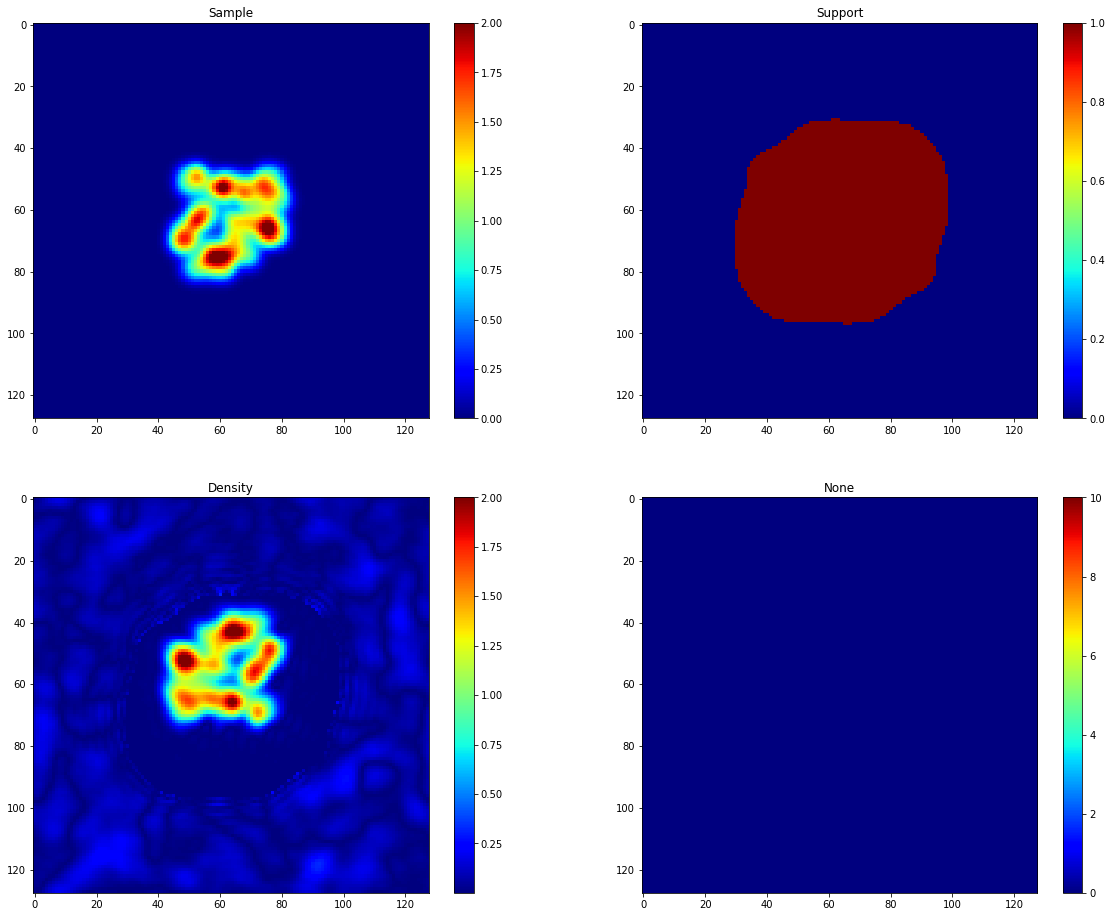

In [7]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[0,1].imshow(np.abs(np.fft.ifftshift(alter_proj.data_dict['support'])), vmin=0, vmax=1, cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Support")

im = axes[1,0].imshow(np.abs(np.fft.ifftshift(alter_proj.data_dict['density'])), vmax=2,cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Density")

im = axes[1,1].imshow(np.zeros_like(sample), vmax=10,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("None")

# Show the canvas
plt.show()  

In [11]:
# Step 2: Initialize the object with the data


alter_proj_2 = copy.deepcopy(alter_proj)

alter_proj_2.set_algorithm(alg_name="ER")
alter_proj_2.set_beta_and_iter_num(iter_num=1000)

alter_proj_2.shrink_warp_properties(on=False)


Since the argument beta is not specified, the arguments decay and decay_rate are ignored.
Disable shrink wrap functions.


In [12]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj_2.execute_algorithm()

Using algorithm ER
Finishes self-consistency check.


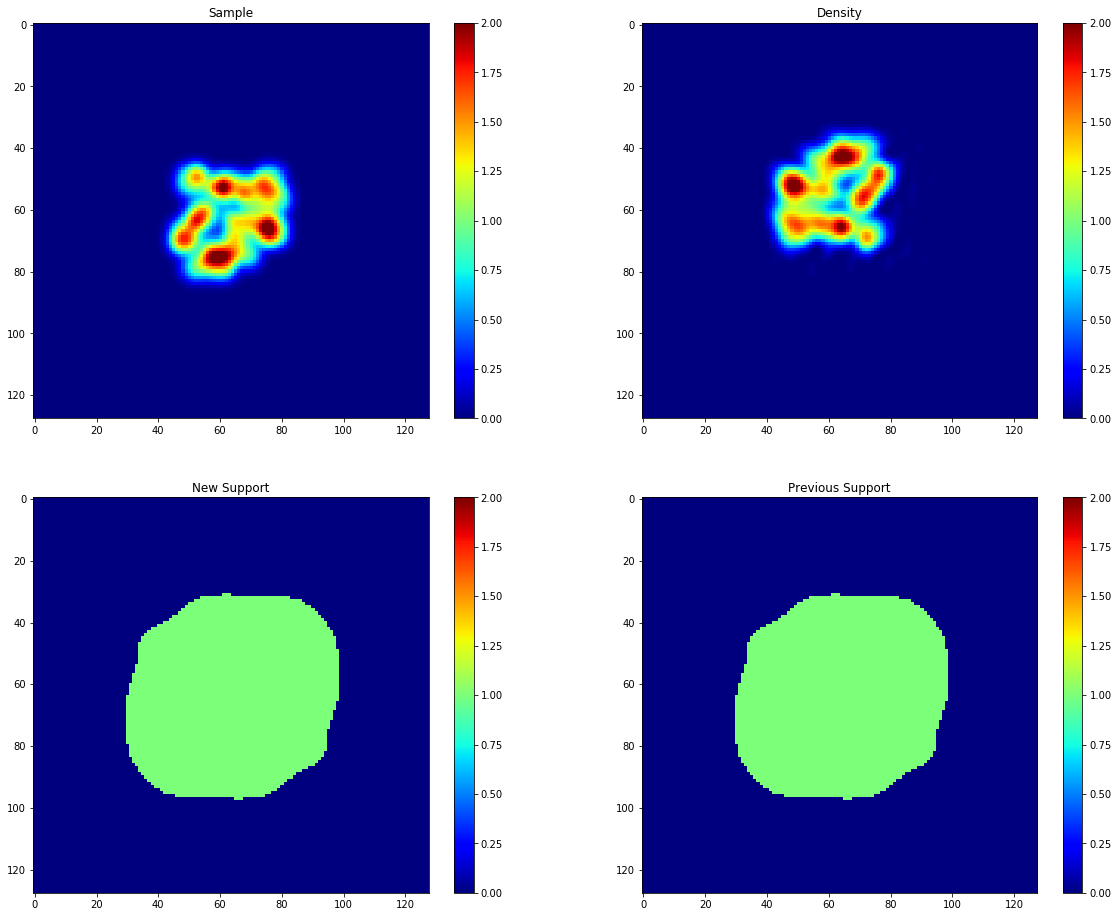

In [13]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, vmin=0, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[1,0].imshow(np.fft.ifftshift(alter_proj_2.data_dict['support']), vmin=0, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("New Support")

im = axes[0,1].imshow(np.abs(np.fft.ifftshift(alter_proj_2.data_dict['density'])), vmin=0, vmax=2,cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Density")

im = axes[1,1].imshow(np.fft.ifftshift(alter_proj.data_dict['support']), vmin=0, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("Previous Support")

# Show the canvas
plt.show()  

In [17]:
# Step 2: Initialize the object with the data

alter_proj_3 = copy.deepcopy(alter_proj_2)

alter_proj_3.shrink_warp_properties(on=True,
                                    threshold_ratio=0.04,
                                    sigma=3.,
                                    decay_rate=50,
                                    threshold_ratio_decay_ratio=1.0,
                                    sigma_decay_ratio=0.99,
                                    filling_holes=False,
                                    convex_hull=False)

alter_proj_3.set_beta_and_iter_num(beta=0.90,
                                 iter_num=1200,
                                 decay=True, 
                                 decay_rate=30)

alter_proj_3.set_algorithm(alg_name="RAAR")

Enable shrink wrap functions.
The initial threshold ratio of the shrink warp algorithm is set to 0.04
The initial sigma of the shrink warp algorithm is set to 3.0
The decay_rate argument is set to be 50
Therefore, the shrink wrap algorithm will be applied every 50iterations of the projections. The change of the parameters of the shrink wrap function will occur after each application. Therefore, if you would like to use a constant parameter for all shrink wraps, please set the argument threshold_ratio_decay_ratio=1.0, and sigma_decay_ratio=1.0. By default, they are 0.9.
The threshold ratio will decay to 1.0 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
The sigma will decay to 0.99 * (current ratio)after each application of the shrink wrap algorithm. To stop this decaying,please set threshold_ratio_decay_ratio=1. when calling this funciton. 
When update the support, use th

In [18]:
# Step 3: Execute the algorithm of RAAR with 200 Iterations:
alter_proj_3.execute_algorithm()

Using algorithm RAAR
Finishes self-consistency check.
This is iteration No.0
Update the support with shrink wrap.
This is iteration No.50
Update the support with shrink wrap.
This is iteration No.100
Update the support with shrink wrap.
This is iteration No.150
Update the support with shrink wrap.
This is iteration No.200
Update the support with shrink wrap.
This is iteration No.250
Update the support with shrink wrap.
This is iteration No.300
Update the support with shrink wrap.
This is iteration No.350
Update the support with shrink wrap.
This is iteration No.400
Update the support with shrink wrap.
This is iteration No.450
Update the support with shrink wrap.
This is iteration No.500
Update the support with shrink wrap.
This is iteration No.550
Update the support with shrink wrap.
This is iteration No.600
Update the support with shrink wrap.
This is iteration No.650
Update the support with shrink wrap.
This is iteration No.700
Update the support with shrink wrap.
This is iteration N

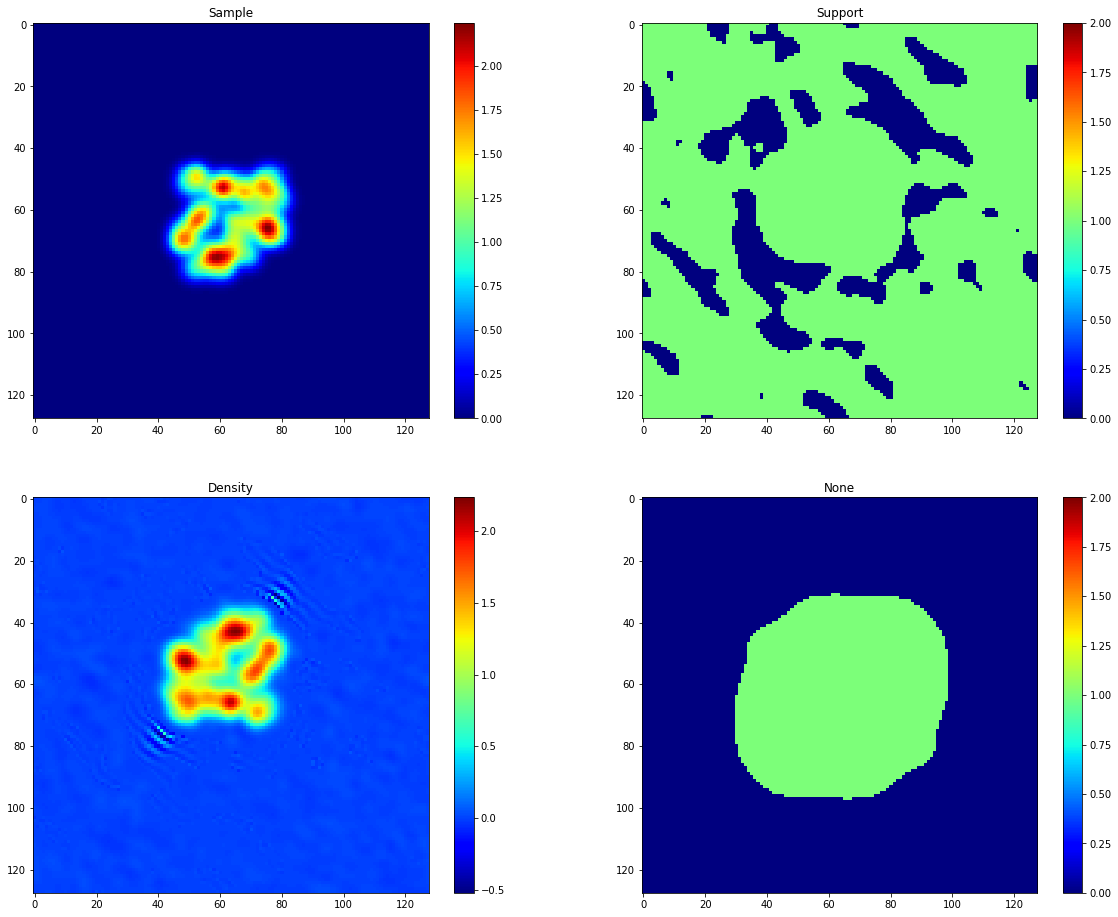

In [20]:
# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(20)

im = axes[0,0].imshow(sample, cmap='jet')
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Sample")

im = axes[0,1].imshow(np.fft.ifftshift(alter_proj_3.data_dict['support']), vmin=0, vmax=2, cmap='jet')
fig.colorbar(im, ax=axes[0,1])
axes[0,1].set_title("Support")

im = axes[1,0].imshow(np.fft.ifftshift(alter_proj_3.data_dict['density']), cmap='jet')
fig.colorbar(im, ax=axes[1,0])
axes[1,0].set_title("Density")

im = axes[1,1].imshow(np.fft.ifftshift(alter_proj.data_dict['support']), vmin = 0, vmax=2,cmap='jet')
fig.colorbar(im, ax=axes[1,1])
axes[1,1].set_title("None")

# Show the canvas
plt.show()  

In [20]:
recover = PhaseTool.util.resolve_trivial_ambiguity(sample, np.fft.ifftshift(alter_proj_3.data_dict['density']))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
center_r = ndimage.center_of_mass(recover)
center_s = ndimage.center_of_mass(sample)

In [16]:
shift_r = ndimage.shift(recover, shift=[63 - center_r[0], 63 - center_r[1]])
shift_s = ndimage.shift(sample, shift=[63 - center_s[0], 63 - center_s[1]])

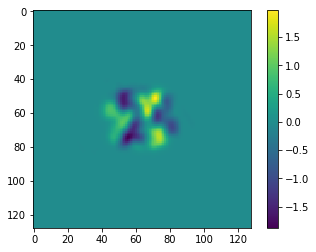

In [17]:
plt.imshow(shift_s - shift_r)
plt.colorbar()
plt.show()

In [18]:
np.sum(np.abs(shift_s - shift_r)) / np.sum(np.abs(shift_s))

1.0875271409820981